**DECISION TREES**

In [1]:
# Import libraries
import numpy as np      # linear algebra
import pandas as pd     # data preparation and pre-processing
import matplotlib.pyplot as plt     # plotting
import seaborn as sns       # statistical data visualization
import graphviz    # visualizing the leaf node
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Control display
pd.options.display.max_columns = 50
sns.set(style="darkgrid", rc={'axes.facecolor': '#CAF1DE'})

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('heart_disease.csv')
df.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


In [3]:
# cp = chest pain
# chol = cholesterol
# fbs = fasting blood sugar
# restecg = resting electrocardiography
# exang = exercise induced agina
# oldpeak = ST depression induced
# slope = slope of the peak exercise
# ca = number of major vessel
# thal = normal, fexied defect, reversible defect
# target = have disease or not (1-yes, 0-no)

In [4]:
# Show people with heart disease.
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [5]:
# Show percentage of male and female patients
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])
print('Percentage of female patients: {:.2f}%' .format(count_female/(len(df.sex))*100))
print('Percentage of male patients: {:.2f}%' .format(count_male/(len(df.sex))*100))

Percentage of female patients: 30.44%
Percentage of male patients: 69.56%


In [6]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [7]:
# Check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Organizing the data to be used during splitting
y = df.target.values
x_data = df.drop(['target'], axis= 1)

In [9]:
# Splitting into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.25, random_state=43) 

In [10]:
# Check the shape of data after splitting. 
X_train.shape , X_test.shape

((768, 13), (257, 13))

In [11]:
# Check datatype
X_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [12]:
# Check x_train header
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
986,55,0,0,180,327,0,2,117,1,3.4,1,0,2
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2
418,62,0,0,124,209,0,1,163,0,0.0,2,0,2
893,52,1,0,128,204,1,1,156,1,1.0,1,0,0
654,41,0,1,126,306,0,1,163,0,0.0,2,0,2


In [13]:
# Instantiate the DecisionTree model.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

**Describe performance of the model.**

In [14]:
# Predict class label for the test data using DecisionTreeClassifier.
y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8249


In [15]:
# The actual values, these are the values that the model should predict.
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [16]:
# Show the predicted values. These are the values predicted by the model.
y_pred_gini

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [17]:
# Print accuracy score for training and testing sets.
print('Training set accuracy score: {0:0.4f}'.format(clf_gini.score(X_train, y_train)))
print('Testing set accuracy score: {0:0.4f}'.format(clf_gini.score(X_test, y_test)))

Training set accuracy score: 0.8529
Testing set accuracy score: 0.8249


In [18]:
# Build a confusion matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
cm

array([[ 92,  33],
       [ 12, 120]], dtype=int64)

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Get the value of other metrics.

precision = precision_score(y_test, y_pred_gini)

recall = recall_score(y_test, y_pred_gini)

f1 = f1_score(y_test, y_pred_gini)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_gini)


print("Precision of the model:", precision)
print("Recall of the model:", recall)
print("F1 Score of the model:", f1)
print("ROC AUC Score:", roc_auc)

Precision of the model: 0.7843137254901961
Recall of the model: 0.9090909090909091
F1 Score of the model: 0.8421052631578948
ROC AUC Score: 0.8225454545454546


**CONCLUSION ABOUT THE MODEL PERFORMANCE.**

In [ ]:
"""
The model achieved an impressive recall of 90.90%. 
This indicates that the model successfully identified 90.9% of all actual positive instances,
demonstrating its strong ability to avoid missing positive cases.
"""

**VISUALIZING DECISION TREES.**

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.5\nsamples = 768\nvalue = [374, 394]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.37\nsamples = 379\nvalue = [286, 93]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.5\nsamples = 166\nvalue = [84, 82]'),
 Text(0.0625, 0.125, 'gini = 0.394\nsamples = 100\nvalue = [27, 73]'),
 Text(0.1875, 0.125, 'gini = 0.236\nsamples = 66\nvalue = [57, 9]'),
 Text(0.375, 0.375, 'x[1] <= 0.5\ngini = 0.098\nsamples = 213\nvalue = [202, 11]'),
 Text(0.3125, 0.125, 'gini = 0.332\nsamples = 38\nvalue = [30, 8]'),
 Text(0.4375, 0.125, 'gini = 0.034\nsamples = 175\nvalue = [172, 3]'),
 Text(0.75, 0.625, 'x[9] <= 1.95\ngini = 0.35\nsamples = 389\nvalue = [88, 301]'),
 Text(0.625, 0.375, 'x[0] <= 56.5\ngini = 0.289\nsamples = 354\nvalue = [62, 292]'),
 Text(0.5625, 0.125, 'gini = 0.16\nsamples = 228\nvalue = [20, 208]'),
 Text(0.6875, 0.125, 'gini = 0.444\nsamples = 126\nvalue = [42, 84]'),
 Text(0.875, 0.375, 'x[10] <= 0.5\ngini = 0.382\nsamples = 35\nvalue = [26, 9]')

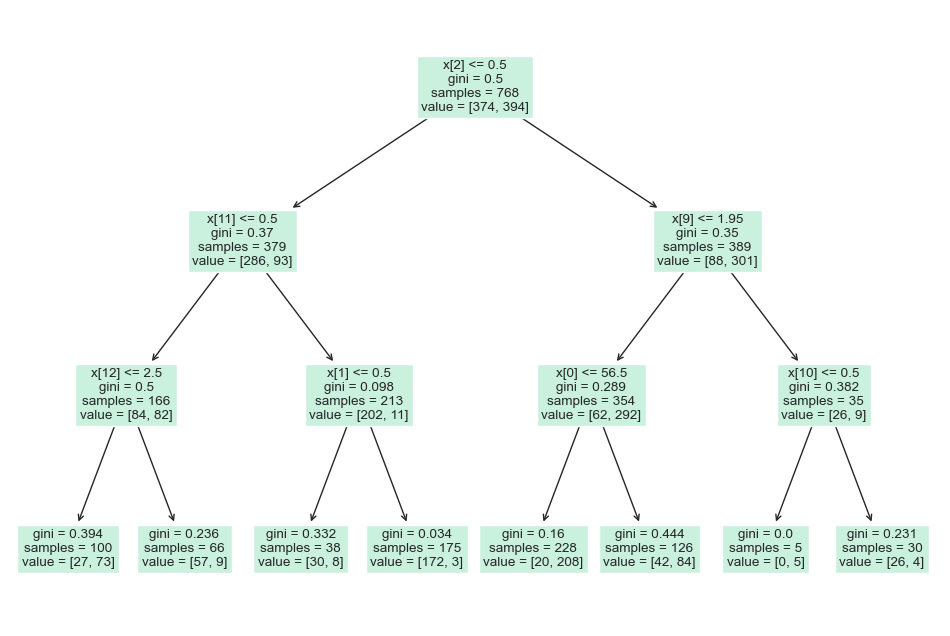

In [21]:
# first way
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [22]:
# Visualizing decision tree (second way)
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(x_data, y)

# Get the class name from the dataset
class_names = df['target'].unique().astype(str)

# Generate the graphviz visualization
tree.export_graphviz(model, out_file='heart_disease.dot', class_names=class_names, feature_names=x_data.columns, label='all', filled=True, rounded=True)